Data Within the Top 5 Leagues - ACS 2500 Project

In [3]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Path-Tracing Tools for Line/Curve-Drawing
import matplotlib.path as mpath

# Tools for Text Imposition
from matplotlib.text import Text

# Line/Curve-Styling Tools
import matplotlib.lines as mlines

# Specialized Line-Drawing Utility
from matplotlib.lines import Line2D

# 2D Polygon-Drawing Tools
import matplotlib.patches as mpatches

# Grid Structuring Tools
import matplotlib.gridspec as gridspec

# 3D Plotting Utilities
from mpl_toolkits.mplot3d import Axes3D

# Tick Locating/Formatting Tools
from matplotlib.ticker import FuncFormatter

# Specialized Polygon Imposition Tools
from matplotlib.patches import Rectangle, Polygon

# Collection of Prebuilt Patch Objects
from matplotlib.collections import PatchCollection

ModuleNotFoundError: No module named 'pandas'

#Section 1: Introduction

For my project I have decided to choose a Player Soccer Dataset. This gives me player data from the 2023 season. Some examples of the data in the dataset is, height, age, weight, player number, the club they play for, and their nationality



Imports hidden ↓

In [ ]:
DATAPATH = "top5_leagues_player.csv"
dataset = pd.read_csv(DATAPATH)


#**Data Dictionary**


*  full_name - Full name of the player
*  age - age of the player
*  height - height of the player
*  nationality  - claimed nationality of player
*  place_of_birth -place of birth of player
*  price - price of player from market
*  max_price - max price of player by market
*  position - position of player
*  shirt_nr  - players jersey number       
*  foot  - their primary foot
*  club - the club the player plays for
*  contract_expires - the date their contract expires
*  joined_club - the date the player joined the club  
*  player_agent - the agent of the player
*  outfitter - the players sponser
* league - the league the player plays in


In [ ]:
FEATURES = dataset.columns.tolist()

FEATURES

['Unnamed: 0',
 'name',
 'full_name',
 'age',
 'height',
 'nationality',
 'place_of_birth',
 'price',
 'max_price',
 'position',
 'shirt_nr',
 'foot',
 'club',
 'contract_expires',
 'joined_club',
 'player_agent',
 'outfitter',
 'league']

In [ ]:
REFPATH = "soccer_simplified_reference.csv"

DESCRIPTORS = [
  "Full name of the player",
  "age of the player",
  "height of the player",
  "claimed nationality of player",
  "place of birth of player",
  "price of player from market",
  "max price of player by market",
  "position of player",
  "players jersey number",
  "their primary foot",
  "the club the player plays for",
  "the date their contract expires",
  "the date the player joined the club",
  "the agent of the player",
  "the players sponser",
 "the league the player plays in",
]

Hidden Code for Data Dictionary ↓

In [ ]:
# @title
def operate_data_dictionary(features, descriptors, method="set", refpath=None):
  """ Operational function to work in creating or getting data dictionary. """
  if method == "set":
    # Produce dictionary-wrapped key-value associations of feature summaries
    data_dictionary = dict(zip(FEATURES, DESCRIPTORS))
    # Convert data dictionary to cleaner reference table
    reference = pd.DataFrame(data_dictionary, index=[0])
    # Save reference table for future access
    if refpath is not None and type(refpath) == str:
      reference.to_csv(refpath, index=False)
  if method == "get":
    # Get reference table from saved data dictionary
    if refpath is not None and type(refpath) == str:
      return pd.read_csv(refpath)
    else:
      raise TypeError("Saved file for data dictionary not found.")

def encode_categorical_feature(dataset, feature, encoding="label"):
  """ Custom function to encode categorical features using label-schema. """
  # Instantiate encoder architecture
  if encoding == "label":
    encoder = LabelEncoder()
  # Transform dataset feature using labeling schema (performs in-place)
  dataset[feature] = encoder.fit_transform(dataset[feature])
  # Get fitted encoder (just in case)
  return encoder

In [ ]:
# Set data dictionary as reference table
operate_data_dictionary(features=FEATURES,
                        descriptors=DESCRIPTORS,
                        method="set",
                        refpath=REFPATH)

In [ ]:
# Get data dictionary as reference table
reference = operate_data_dictionary(features=FEATURES,
                                    descriptors=DESCRIPTORS,
                                    method="get",
                                    refpath=REFPATH)

In [ ]:
reference.T

,0
Unnamed: 0,Full name of the player
name,age of the player
full_name,height of the player
age,claimed nationality of player
height,place of birth of player
nationality,price of player from market
place_of_birth,max price of player by market
price,position of player
max_price,players jersey number
position,their primary foot


In [ ]:
#question 1
#count of dataset(rows)
len(dataset)

#(Gets the shape of the dataset as a coordinate (x,y))
np.shape(dataset)

#Gets the rows and cols separated, easy to follow
rows = len(dataset.axes[0])
cols = len(dataset.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)


Number of Rows:  2612
Number of Columns:  18


In [ ]:
dataset.isna().sum()



try:
  dataset.drop(columns=all, inplace=True)
except:
  KeyError("Column(s) already dropped.")


dataset.dropna(axis=0, inplace = True)



dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 2 to 2590
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        537 non-null    int64  
 1   name              537 non-null    object 
 2   full_name         537 non-null    object 
 3   age               537 non-null    int64  
 4   height            537 non-null    float64
 5   nationality       537 non-null    object 
 6   place_of_birth    537 non-null    object 
 7   price             537 non-null    float64
 8   max_price         537 non-null    float64
 9   position          537 non-null    object 
 10  shirt_nr          537 non-null    int64  
 11  foot              537 non-null    object 
 12  club              537 non-null    object 
 13  contract_expires  537 non-null    object 
 14  joined_club       537 non-null    object 
 15  player_agent      537 non-null    object 
 16  outfitter         537 non-null    object 
 

#Section 2: Preprocessing


Q1. What is the size of my dataset (How many rows/columns)

Q2. Are there null values in the data

Q3. What does the dataset look like based on league

Q4. What do the top and bottom of the dataset look like (why)?

Q5. What does the dataset look like sorted by age?






#Q1 : How many rows and columns does the dataset have?

In [ ]:
#question 1
#count of dataset(rows)
len(dataset)

#(Gets the shape of the dataset as a coordinate (x,y))
np.shape(dataset)

#Gets the rows and cols separated, easy to follow
rows = len(dataset.axes[0])
cols = len(dataset.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)


Number of Rows:  537
Number of Columns:  18


#Q2 Are there null values in the dataset? If so then drop

In [ ]:
dataset.isna().sum()



try:
  dataset.drop(columns=all, inplace=True)
except:
  KeyError("Column(s) already dropped.")


dataset.dropna(axis=0, inplace = True)



dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 2 to 2590
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        537 non-null    int64  
 1   name              537 non-null    object 
 2   full_name         537 non-null    object 
 3   age               537 non-null    int64  
 4   height            537 non-null    float64
 5   nationality       537 non-null    object 
 6   place_of_birth    537 non-null    object 
 7   price             537 non-null    float64
 8   max_price         537 non-null    float64
 9   position          537 non-null    object 
 10  shirt_nr          537 non-null    int64  
 11  foot              537 non-null    object 
 12  club              537 non-null    object 
 13  contract_expires  537 non-null    object 
 14  joined_club       537 non-null    object 
 15  player_agent      537 non-null    object 
 16  outfitter         537 non-null    object 
 

#Q3 What does the dataset look like by league

In [ ]:
 #See that Bundesliga is the first league in the dataset from club names
 #Seria A is the last league in the dataset based on club as well



 ARG_SERIEA = (dataset["league"] == "SerieA")
 ARG_BUNDAS =(dataset["league"] == "Bundesliga")
 ARG_ENG = (dataset["league"] == "EPL")
 ARG_SPN = (dataset["league"] == "LaLiga")
 ARG_FRN = dataset["league"] == "Ligue1"

 #dataset.sort_values(by='league').head()


 #dataset.sort_values(by = 'league').tail()

dataset_german = dataset[ARG_BUNDAS]
dataset_italy = dataset[ARG_SERIEA]
dataset_eng = dataset[ARG_ENG]
dataset_spn = dataset[ARG_SPN]
dataset_frn = dataset[ARG_FRN]

display(dataset_german)
display(dataset_italy)
display(dataset_eng)
display(dataset_spn)
display(dataset_frn)


,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
533,533,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.00,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas,Bundesliga
538,538,Dayot Upamecano,Dayotchanculle Oswald Upamecano,24,1.86,France Guinea-Bissau,Évreux,60.00,60.0,Defender - Centre-Back,2,right,Bayern Munich,2026-06-30,2021-07-05,Unique Sports Group,Nike,Bundesliga
539,539,Lucas Hernández,Lucas François Bernard Hernández Pi,27,1.84,France Spain,Marseille,50.00,70.0,Defender - Centre-Back,21,left,Bayern Munich,2024-06-30,2019-07-01,Manuel García ...,Nike,Bundesliga
542,542,João Cancelo,João Pedro Cavaco Cancelo,28,1.82,Portugal,Barreiro,60.00,70.0,Defender - Right-Back,22,right,Bayern Munich,2023-06-30,2023-01-31,Gestifute,Nike,Bundesliga
544,544,Noussair Mazraoui,نصير مزراوي,25,1.83,Morocco Netherlands,Leiderdorp,28.00,28.0,Defender - Right-Back,40,right,Bayern Munich,2026-06-30,2022-07-01,Rafaela Pimenta,adidas,Bundesliga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,Maya Yoshida,吉田 麻也,34,1.89,Japan,"Nagasaki, Nagasaki",1.50,7.0,Defender - Centre-Back,4,right,FC Schalke 04,2023-06-30,2022-07-05,CAA Base Ltd,Mizuno,Bundesliga
1005,1005,Alex Kral,Alex Král,24,1.86,Czech Republic Slovakia,Košice,5.50,10.0,midfield - Defensive Midfield,30,right,FC Schalke 04,2023-06-30,2022-07-14,K2K Sports ...,Nike,Bundesliga
1043,1043,Takuma Asano,浅野 拓磨,28,1.73,Japan,"Komono, Mie",4.00,4.0,Attack - Right Winger,11,right,VfL Bochum,2024-06-30,2021-07-01,JEB ENTERTAINMENT ...,adidas,Bundesliga
1045,1045,Simon Zoller,Simon Martin Zoller,31,1.79,Germany,Friedrichshafen,1.10,3.0,Attack - Centre-Forward,9,right,VfL Bochum,2024-06-30,2019-01-01,GoalSky,Puma,Bundesliga


,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
1079,1079,Fikayo Tomori,Oluwafikayomi Oluwadamilola Tomori,25,1.85,England Canada,"Calgary, Alberta",45.0,50.0,Defender - Centre-Back,23,right,AC Milan,2027-06-30,2021-07-01,SPORT INVEST,adidas,SerieA
1083,1083,Simon Kjaer,Simon Thorup Kjær,34,1.91,Denmark,Horsens,5.0,13.0,Defender - Centre-Back,24,right,AC Milan,2024-06-30,2020-09-01,Beckster Int.,Nike,SerieA
1085,1085,Fodé Ballo-Touré,Fodé Ballo-Touré,26,1.82,Senegal France,Conflans-Sainte-Honorine,3.5,12.0,Defender - Left-Back,5,left,AC Milan,2025-06-30,2021-07-18,BS Group - BS Law,adidas,SerieA
1094,1094,Aster Vranckx,Aster Jan Vranckx,20,1.83,Belgium DR Congo,Erps-Kwerps,8.5,10.0,midfield - Central Midfield,40,right,AC Milan,2023-06-30,2022-09-01,DW Sports Management,Nike,SerieA
1096,1096,Brahim Díaz,Brahim Abdelkader Díaz,23,1.71,Spain Morocco,Málaga,20.0,25.0,midfield - Attacking Midfield,10,both,AC Milan,2023-06-30,2021-07-19,Sports&Life,Nike,SerieA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,1537,Darko Lazović,Дарко Лазовић,32,1.81,Serbia,Cacak,2.5,5.0,midfield - Left Midfield,8,right,Hellas Verona,2024-06-30,2019-08-06,Seven Stars,adidas,SerieA
1546,1546,Milan Djuric,Milan Đurić,32,1.99,Bosnia-Herzegovina Italy,Tuzla,1.0,1.5,Attack - Centre-Forward,19,right,Hellas Verona,2025-06-30,2022-07-01,OFP OMNIA FOOTBALL ...,Lotto,SerieA
1548,1548,Emil Audero,Emil Audero Mulyadi,26,1.92,Italy,Mataram,6.0,15.0,Goalkeeper,1,right,Sampdoria,2026-06-30,2019-07-01,TMP SOCCER srl,Nike,SerieA
1560,1560,Harry Winks,Harry Billy Winks,27,1.78,England,Hemel Hempstead,12.0,40.0,midfield - Defensive Midfield,20,right,Sampdoria,2023-06-30,2022-08-30,CAA Stellar,adidas,SerieA


,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
7,7,Manuel Akanji,Manuel Obafemi Akanji,27,1.88,Switzerland Nigeria,Wiesendangen,30.00,40.0,Defender - Centre-Back,25,right,Man City,2027-06-30,2022-09-01,IFM,Nike,EPL
10,10,Kyle Walker,Kyle Andrew Walker,32,1.83,England,Sheffield,15.00,50.0,Defender - Right-Back,2,right,Man City,2024-06-30,2017-07-14,CAA Base Ltd,Puma,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,520,Philip Billing,Philip Anyanwu Billing,26,1.93,Denmark Nigeria,Copenhagen,18.00,18.0,midfield - Central Midfield,29,left,Bournemouth,2024-06-30,2019-07-29,ROOF,adidas,EPL
521,521,Lewis Cook,Lewis John Cook,26,1.75,England,York,10.00,20.0,midfield - Central Midfield,4,right,Bournemouth,2025-06-30,2016-07-08,CAA Stellar,adidas,EPL
527,527,Junior Stanislas,Felix Junior Stanislas,33,1.83,England St. Lucia,London,0.70,4.5,Attack - Left Winger,19,right,Bournemouth,2023-06-30,2014-07-01,ROOF,Nike,EPL
529,529,David Brooks,David Robert Brooks,25,1.73,Wales England,Warrington,12.00,30.0,Attack - Right Winger,7,left,Bournemouth,2026-06-30,2018-07-01,Unique Sports Group,Nike,EPL


,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
1603,1603,Thibaut Courtois,Thibaut Nicolas Marc Courtois,31,2.00,Belgium,Bree,60.0,75.0,Goalkeeper,1,left,Real Madrid,2026-06-30,2018-08-09,Christophe Henrotay,Nike,LaLiga
1604,1604,Andriy Lunin,Лунін Андрій Олексійович,24,1.91,Ukraine,"Krasnograd, Kharkiv Oblast",5.0,8.5,Goalkeeper,13,right,Real Madrid,2024-06-30,2018-07-01,Relatives,Nike,LaLiga
1606,1606,Éder Militão,Éder Gabriel Militão,25,1.86,Brazil Spain,Sertãozinho,70.0,70.0,Defender - Centre-Back,3,right,Real Madrid,2025-06-30,2019-07-01,UJ Football Talent,adidas,LaLiga
1607,1607,David Alaba,David Olatukunbo Alaba,30,1.80,Austria,Wien,50.0,65.0,Defender - Centre-Back,4,left,Real Madrid,2026-06-30,2021-07-01,Relatives,adidas,LaLiga
1612,1612,Daniel Carvajal,Daniel Carvajal Ramos,31,1.73,Spain,Leganés,15.0,60.0,Defender - Right-Back,2,right,Real Madrid,2025-06-30,2013-07-01,Ginés Carvajal,Nike,LaLiga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,2082,Omar Mascarell,Omar Mascarell González,30,1.81,Spain Equatorial Guinea,Santa Cruz de Tenerife,3.5,14.0,midfield - Defensive Midfield,21,right,Elche CF,2025-06-30,2021-08-23,LEADERBROCK,adidas,LaLiga
2083,2083,Gerard Gumbau,Gerard Gumbau Garriga,28,1.88,Spain,Campllong,3.0,3.0,midfield - Defensive Midfield,20,left,Elche CF,2023-06-30,2021-08-31,CONTROL ORIENTADO,Nike,LaLiga
2085,2085,Pape Cheikh,Pape Cheikh Diop Gueye,25,1.80,Senegal Spain,Guédiawaye,1.5,7.0,midfield - Central Midfield,12,right,Elche CF,2023-06-30,2023-02-14,4MB,Nike,LaLiga
2090,2090,Álex Collado,Álex Collado Gutiérrez,24,1.77,Spain,Sabadell,4.0,5.0,Attack - Right Winger,15,left,Elche CF,2023-06-30,2022-08-15,Goal Management,Nike,LaLiga


,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
2100,2100,Sergio Ramos,Sergio Ramos García,37,1.84,Spain,Camas,6.0,50.0,Defender - Centre-Back,4,right,Paris SG,2023-06-30,2021-07-08,RR-Soccer ...,Mizuno,Ligue1
2101,2101,Nuno Mendes,Nuno Alexandre Tavares Mendes,20,1.83,Portugal,Lisboa,65.0,65.0,Defender - Left-Back,25,left,Paris SG,2026-06-30,2022-07-01,MRP.POSITIONUMBER,adidas,Ligue1
2102,2102,Juan Bernat,Juan Bernat Velasco,30,1.70,Spain,Cullera,12.0,20.0,Defender - Left-Back,14,left,Paris SG,2025-06-30,2018-08-31,InterStarDeporte,adidas,Ligue1
2105,2105,Timothée Pembélé,Timothée Joseph Pembélé,20,1.83,France DR Congo,Beaumont-sur-Oise,5.0,7.0,Defender - Right-Back,29,right,Paris SG,2024-06-30,2020-07-01,Sport Cover,Puma,Ligue1
2106,2106,Danilo Pereira,Danilo Luís Hélio Pereira,31,1.88,Portugal Guinea-Bissau,Bissau,12.0,30.0,midfield - Defensive Midfield,15,right,Paris SG,2025-06-30,2021-07-01,Gestifute,Nike,Ligue1
2109,2109,Fabián Ruiz,Fabián Ruiz Peña,27,1.89,Spain,Los Palacios y Villafranca,38.0,60.0,midfield - Central Midfield,8,left,Paris SG,2027-06-30,2022-08-30,YOU FIRST,adidas,Ligue1
2110,2110,Carlos Soler,Carlos Soler Barragán,26,1.80,Spain,Valencia,30.0,50.0,midfield - Central Midfield,28,right,Paris SG,2027-06-30,2022-09-01,Promoesport,adidas,Ligue1
2111,2111,Renato Sanches,Renato Júnior Luz Sanches,25,1.76,Portugal Sao Tome and Principe,Lisboa,20.0,30.0,midfield - Central Midfield,18,right,Paris SG,2027-06-30,2022-08-04,Gestifute,adidas,Ligue1
2113,2113,Ismaël Gharbi,Ismaël Gharbi Álvarez,19,1.73,Spain France,Paris,5.0,5.0,midfield - Attacking Midfield,35,right,Paris SG,2025-06-30,2022-07-01,AMS CONSULTING,adidas,Ligue1
2115,2115,Lionel Messi,Lionel Andrés Messi Cuccitini,35,1.70,Argentina Spain,Rosario,45.0,180.0,Attack - Right Winger,30,left,Paris SG,2023-06-30,2021-08-10,Relatives,adidas,Ligue1


#Q4 What does the top and bottom of the table look like? and Why?

In [ ]:
dataset.head()


,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
7,7,Manuel Akanji,Manuel Obafemi Akanji,27,1.88,Switzerland Nigeria,Wiesendangen,30.00,40.0,Defender - Centre-Back,25,right,Man City,2027-06-30,2022-09-01,IFM,Nike,EPL
10,10,Kyle Walker,Kyle Andrew Walker,32,1.83,England,Sheffield,15.00,50.0,Defender - Right-Back,2,right,Man City,2024-06-30,2017-07-14,CAA Base Ltd,Puma,EPL


In [ ]:

dataset.tail()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
2469,2469,Mama Baldé,Mama Samba Baldé,27,1.76,Guinea-Bissau Portugal,Bissau,8.0,8.0,Attack - Centre-Forward,7,right,Troyes,2025-06-30,2021-07-31,Relatives,adidas,Ligue1
2504,2504,Faouzi Ghoulam,فوزي غلام,32,1.84,Algeria France,Saint-Priest-en-Jarez,1.0,25.0,Defender - Left-Back,8,left,Angers SCO,2023-06-30,2023-01-31,Gestifute,Nike,Ligue1
2543,2543,Kays Ruiz-Atil,قيس رويز عطيل,20,1.77,Morocco France,Lyon,1.0,3.0,midfield - Central Midfield,18,right,AJ Auxerre,2025-06-30,2022-07-01,One Team Management,Puma,Other
2580,2580,Komnen Andric,Комнен Андрић,27,1.89,Serbia,Novi Pazar,2.0,2.0,Attack - Centre-Forward,9,right,Clermont Foot,2025-06-30,2022-07-15,Love Players,adidas,Other
2590,2590,Ismaël Diallo,Ismaël Jean Chester Diallo,26,1.78,Cote d'Ivoire,Séguéla,1.5,1.5,Defender - Left-Back,3,left,AC Ajaccio,2023-06-30,2018-07-01,Supernova Management,Puma,Other


###Q4 Answer to the Why

The dataset seems to start with the first place team in the last season of their league, (ex. Manchester City at the head of the dataset with AC Ajaccio being last in the dataset) and then the players sorted by number on the team. This is from the source _

#Q5 What does the dataset look like sorted by age? Sort each league by age

In [ ]:
dataset.sort_values(by= "age")

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
93,93,Stefan Bajcetic,Stefan Bajčetić Maquieira,18,1.85,Spain Serbia,Vigo,13.0,13.0,midfield - Defensive Midfield,43,right,Liverpool,2027-06-30,2022-07-01,F.J.VILLAVERDE,adidas,EPL
135,135,Alejandro Garnacho,Alejandro Garnacho Ferreyra,18,1.80,Argentina Spain,Madrid,25.0,25.0,Attack - Left Winger,49,right,Man Utd,2028-06-30,2022-07-01,#LEADERS,Nike,EPL
775,775,Umut Tohumcu,Umut Deger Tohumcu,18,1.75,Germany Turkey,Offenburg,1.0,1.0,midfield - Central Midfield,40,both,TSG Hoffenheim,2026-06-30,2023-01-18,ROGON,adidas,Bundesliga
1234,1234,Luka Romero,Luka Romero Bezzana,18,1.65,Argentina Spain,Victoria de Durango,1.0,1.0,Attack - Right Winger,18,left,Lazio,2023-06-30,2021-07-20,LIAN Sports Group,Nike,SerieA
1635,1635,Alejandro Balde,Alejandro Balde Martínez,19,1.75,Spain Dominican Republic,Barcelona,30.0,30.0,Defender - Left-Back,28,left,Barcelona,2024-06-30,2022-07-01,Gestifute,Nike,LaLiga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,Lukasz Fabianski,Łukasz Marek Fabiański,38,1.90,Poland,Kostrzyn nad Odrą,1.0,9.0,Goalkeeper,1,right,West Ham,2023-06-30,2018-07-01,ROOF,adidas,EPL
32,32,Thiago Silva,Thiago Emiliano da Silva,38,1.81,Brazil France,Rio de Janeiro,2.5,40.0,Defender - Centre-Back,6,right,Chelsea,2024-06-30,2020-08-28,Paulo Tonietto,Nike,EPL
1106,1106,Samir Handanovic,Samir Handanovič,38,1.93,Slovenia,Ljubljana,1.0,24.0,Goalkeeper,1,right,Inter,2023-06-30,2012-07-09,LIAN Sports Group,Nike,SerieA
655,655,Makoto Hasebe,長谷部 誠,39,1.80,Japan,"Fujieda, Shizuoka",0.8,5.0,Defender - Centre-Back,20,right,E. Frankfurt,2024-06-30,2014-07-01,PRO Profil GmbH,Puma,Bundesliga


In [ ]:
#German League
dataset_german.sort_values(by= "age")

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
775,775,Umut Tohumcu,Umut Deger Tohumcu,18,1.75,Germany Turkey,Offenburg,1.0,1.0,midfield - Central Midfield,40,both,TSG Hoffenheim,2026-06-30,2023-01-18,ROGON,adidas,Bundesliga
694,694,Oscar Fraulo,Oscar Luigi Fraulo,19,1.80,Denmark Italy,Odense,2.0,2.0,midfield - Central Midfield,22,right,Bor. M'gladbach,2026-06-30,2022-07-01,NINE Group,Nike,Bundesliga
768,768,Justin Che,Justin Isiah Che,19,1.85,United States Germany,"Richardson, Texas",2.0,3.0,Defender - Right-Back,24,right,TSG Hoffenheim,2023-06-30,2023-01-18,CAA Stellar,Nike,Bundesliga
862,862,Ömer Beyaz,Ömer Faruk Beyaz,19,1.71,Turkey,Istanbul,0.7,1.0,midfield - Attacking Midfield,30,left,VfB Stuttgart,2025-06-30,2021-07-01,M-Soccermanagement,Nike,Bundesliga
687,687,Joe Scally,Joseph Michael Scally,20,1.84,United States,"Lake Grove, New York",12.0,12.0,Defender - Right-Back,29,right,Bor. M'gladbach,2027-06-30,2021-01-01,Wasserman,Nike,Bundesliga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,Maya Yoshida,吉田 麻也,34,1.89,Japan,"Nagasaki, Nagasaki",1.5,7.0,Defender - Centre-Back,4,right,FC Schalke 04,2023-06-30,2022-07-05,CAA Base Ltd,Mizuno,Bundesliga
559,559,Eric Maxim Choupo-Moting,Eric Maxim Choupo-Moting,34,1.91,Cameroon Germany,Hamburg,6.0,10.0,Attack - Centre-Forward,13,right,Bayern Munich,2024-06-30,2020-10-05,ROGON,Puma,Bundesliga
813,813,Rafal Gikiewicz,Rafał Gikiewicz,35,1.90,Poland,Olsztyn,1.2,1.5,Goalkeeper,1,right,FC Augsburg,2023-06-30,2020-07-01,Wasserman,adidas,Bundesliga
533,533,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas,Bundesliga


In [ ]:
#Italian League
dataset_italy.sort_values(by= "age")

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
1234,1234,Luka Romero,Luka Romero Bezzana,18,1.65,Argentina Spain,Victoria de Durango,1.0,1.0,Attack - Right Winger,18,left,Lazio,2023-06-30,2021-07-20,LIAN Sports Group,Nike,SerieA
1155,1155,Matías Soulé,Matías Soulé Malvano,20,1.82,Argentina Italy,Mar del Plata,4.0,4.0,Attack - Right Winger,30,left,Juventus,2026-06-30,2022-07-01,Guastadisegno,adidas,SerieA
1201,1201,Benjamin Tahirovic,Benjamin Tahirović,20,1.93,Bosnia-Herzegovina Sweden,Spånga,1.0,1.0,midfield - Central Midfield,68,right,AS Roma,2026-06-30,2022-11-01,Universal Twenty Two,Nike,SerieA
1094,1094,Aster Vranckx,Aster Jan Vranckx,20,1.83,Belgium DR Congo,Erps-Kwerps,8.5,10.0,midfield - Central Midfield,40,right,AC Milan,2023-06-30,2022-09-01,DW Sports Management,Nike,SerieA
1369,1369,Joshua Zirkzee,Joshua Orobosa Zirkzee,21,1.93,Netherlands Nigeria,Schiedam,9.0,11.0,Attack - Centre-Forward,11,right,Bologna,2026-06-30,2022-08-30,Sports Invest UK ltd,Nike,SerieA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,1184,Rui Patrício,Rui Pedro dos Santos Patrício,35,1.90,Portugal,Leiria,5.0,20.0,Goalkeeper,1,left,AS Roma,2024-06-30,2021-07-13,Gestifute,Puma,SerieA
1218,1218,Stefan Radu,Ștefan Daniel Radu,36,1.83,Romania,Bukarest,0.4,10.0,Defender - Left-Back,26,left,Lazio,2023-06-30,2008-07-01,Matteo Materazzi,adidas,SerieA
1103,1103,Olivier Giroud,Olivier Jonathan Giroud,36,1.92,France,Chambéry,4.0,27.0,Attack - Centre-Forward,9,left,AC Milan,2024-06-30,2021-07-17,One Team Football,Puma,SerieA
1131,1131,Edin Dzeko,Edin Džeko,37,1.93,Bosnia-Herzegovina,Sarajevo,4.0,32.0,Attack - Centre-Forward,9,right,Inter,2023-06-30,2021-08-14,World Soccer Agency,adidas,SerieA


In [ ]:
#English League
dataset_eng.sort_values(by= "age")

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
135,135,Alejandro Garnacho,Alejandro Garnacho Ferreyra,18,1.80,Argentina Spain,Madrid,25.00,25.0,Attack - Left Winger,49,right,Man Utd,2028-06-30,2022-07-01,#LEADERS,Nike,EPL
93,93,Stefan Bajcetic,Stefan Bajčetić Maquieira,18,1.85,Spain Serbia,Vigo,13.00,13.0,midfield - Defensive Midfield,43,right,Liverpool,2027-06-30,2022-07-01,F.J.VILLAVERDE,adidas,EPL
303,303,Juan Larios,Juan Larios López,19,1.70,Spain,Tomares,7.00,7.0,Defender - Left-Back,28,left,Southampton,2027-06-30,2022-09-01,Promoesport,adidas,EPL
345,345,Julio Enciso,Julio César Enciso,19,1.73,Paraguay,Caaguazú,11.00,11.0,Attack - Centre-Forward,20,right,Brighton,2026-06-30,2022-07-01,Pedro Aldave Ortuzar,adidas,EPL
305,305,Tino Livramento,Valentino Francisco Livramento,20,1.73,England Scotland,London,25.00,25.0,Defender - Right-Back,21,right,Southampton,2026-06-30,2021-08-02,Wasserman,adidas,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,458,Vicente Guaita,Vicente Guaita Panadero,36,1.90,Spain,Torrente,1.50,10.0,Goalkeeper,13,right,Crystal Palace,2024-06-30,2018-07-01,JCRsport,Sells,EPL
254,254,Ashley Young,Ashley Simon Young,37,1.75,England Jamaica,Stevenage,1.00,27.0,Defender - Right-Back,18,both,Aston Villa,2023-06-30,2021-07-01,CAA Base Ltd,adidas,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
195,195,Lukasz Fabianski,Łukasz Marek Fabiański,38,1.90,Poland,Kostrzyn nad Odrą,1.00,9.0,Goalkeeper,1,right,West Ham,2023-06-30,2018-07-01,ROOF,adidas,EPL


In [ ]:
#Spainish League
dataset_spn.sort_values(by= "age")

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
1694,1694,Momo Cho,Mohamed-Ali Cho,19,1.82,France England,Stains,15.0,15.0,Attack - Centre-Forward,11,left,Real Sociedad,2027-06-30,2022-07-01,Sparka Management,adidas,LaLiga
1635,1635,Alejandro Balde,Alejandro Balde Martínez,19,1.75,Spain Dominican Republic,Barcelona,30.0,30.0,Defender - Left-Back,28,left,Barcelona,2024-06-30,2022-07-01,Gestifute,Nike,LaLiga
1786,1786,Yunus Musah,Yunus Dimoara Musah,20,1.78,United States England,"New York City, New York",22.0,25.0,midfield - Central Midfield,4,right,Valencia,2026-06-30,2020-08-01,Relatives,Puma,LaLiga
1645,1645,Ansu Fati,Anssumane Fati Vieira,20,1.78,Spain Guinea-Bissau,Bissau,35.0,80.0,Attack - Left Winger,10,right,Barcelona,2027-06-30,2020-09-23,Relatives,Nike,LaLiga
1901,1901,Arnau Martínez,Arnau Martínez López,20,1.82,Spain,Premià de Dalt,15.0,15.0,Defender - Right-Back,4,right,Girona,2025-06-30,2021-04-01,TRIPLE MATCH,adidas,LaLiga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,2067,Álvaro Negredo,Álvaro Negredo Sánchez,37,1.86,Spain,Madrid,1.2,27.0,Attack - Centre-Forward,18,left,Cádiz CF,2023-06-30,2020-08-04,Niagara Sports ...,New Balance,LaLiga
1620,1620,Luka Modric,Luka Modrić,37,1.72,Croatia,Zadar,10.0,55.0,midfield - Central Midfield,10,right,Real Madrid,2023-06-30,2012-08-27,Universal Twenty Two,Nike,LaLiga
1689,1689,David Silva,David Josué Jiménez Silva,37,1.70,Spain,Arguineguín,4.0,50.0,midfield - Attacking Midfield,21,left,Real Sociedad,2024-06-30,2020-08-17,IFM,Puma,LaLiga
1966,1966,Radamel Falcao,Radamel Falcao García Zárate,37,1.77,Colombia Venezuela,Santa Marta,2.0,60.0,Attack - Centre-Forward,9,right,Rayo Vallecano,2023-06-30,2021-09-04,Gestifute,Nike,LaLiga


In [ ]:
#French League
dataset_frn.sort_values(by= "age")

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
2359,2359,Habib Diarra,Mouhamadou Habib Diarra,19,1.79,France Senegal,Guédiawaye,4.0,4.0,midfield - Defensive Midfield,19,right,R. Strasbourg,2027-06-30,2022-07-01,Carmenta,Nike,Ligue1
2113,2113,Ismaël Gharbi,Ismaël Gharbi Álvarez,19,1.73,Spain France,Paris,5.0,5.0,midfield - Attacking Midfield,35,right,Paris SG,2025-06-30,2022-07-01,AMS CONSULTING,adidas,Ligue1
2101,2101,Nuno Mendes,Nuno Alexandre Tavares Mendes,20,1.83,Portugal,Lisboa,65.0,65.0,Defender - Left-Back,25,left,Paris SG,2026-06-30,2022-07-01,MRP.POSITIONUMBER,adidas,Ligue1
2105,2105,Timothée Pembélé,Timothée Joseph Pembélé,20,1.83,France DR Congo,Beaumont-sur-Oise,5.0,7.0,Defender - Right-Back,29,right,Paris SG,2024-06-30,2020-07-01,Sport Cover,Puma,Ligue1
2344,2344,Elye Wahi,Sepe Elye Wahi,20,1.84,France Cote d'Ivoire,Courcouronnes,25.0,25.0,Attack - Centre-Forward,21,right,Montpellier,2025-06-30,2021-01-01,DW Sports Management,adidas,Ligue1
2174,2174,Simon Ngapandouetnbu,Simon Brady Ngapandouetnbu,20,1.86,Cameroon France,Foumban,0.4,0.4,Goalkeeper,1,right,Marseille,2024-06-30,2019-10-11,SVF FOOT,Puma,Ligue1
2389,2389,Folarin Balogun,Folarin Jerry Balogun,21,1.78,England United States,"New York City, New York",25.0,25.0,Attack - Centre-Forward,29,right,Stade Reims,2023-06-30,2022-08-03,Elite Project Group ...,adidas,Ligue1
2171,2171,Arnaud Kalimuendo,Arnaud Kalimuendo Muinga,21,1.75,France DR Congo,Suresnes,25.0,25.0,Attack - Centre-Forward,9,right,Rennes,2027-06-30,2022-08-11,DW Sports Management,adidas,Ligue1
2256,2256,Angel Gomes,Angel Almeida Gomés,22,1.68,England Portugal,London,13.0,13.0,midfield - Attacking Midfield,20,right,LOSC Lille,2025-06-30,2020-08-09,Gol International,Nike,Ligue1
2211,2211,Hicham Boudaoui,هشام بوداوي,23,1.75,Algeria,Béchar,7.0,7.0,midfield - Central Midfield,28,right,OGC Nice,2027-06-30,2019-09-02,Elite Sports ...,Nike,Ligue1


#Section 3: Descriptive Analysis

Q1 Out of the top 10 player nationalities which sees more quality players (based of the mean max price)


Q2 Which outfitter has the most amount of players from the leagues ?

Q3. Who are the best 11 players throughout the leagues using max price

Q4 Which league has the most amount of young players.

Q5 What is the correlation between the number of young players based on the league ranking from the Global Football Ranking

Q6 What are the top ten players in each league(based on max price)


##Q1 Out of the top 10 player nationalities which sees more quality players (based of the mean max price)

In [ ]:
#q1

###dataset_nationality = dataset.value_counts('nationality')
#print(dataset_nationality.head(10))

nations = ['Spain', 'Italy', 'Germany', 'France', 'England', 'Brazil', 'Portugal', 'Argentina', 'Italy', 'Denmark']
temp = dataset[dataset['nationality'].isin(nations)]

#temp1 = dataset.groupby("nationality")["max_price"].median()
temp1 = temp.groupby('nationality')["max_price"].mean()

print(temp1)


nationality
Argentina    45.666667
Brazil       42.333333
Denmark      20.714286
England      34.973684
France       48.500000
Germany      34.666667
Italy        11.000000
Portugal     47.769231
Spain        23.797436
Name: max_price, dtype: float64


In [ ]:
def region_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 1], [2,  3], [4, 6], [7, 8]]

    for idx, sub_title in enumerate(['South America', 'Northern Euro', 'Western Euro', 'Southern Euro']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating (After)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()

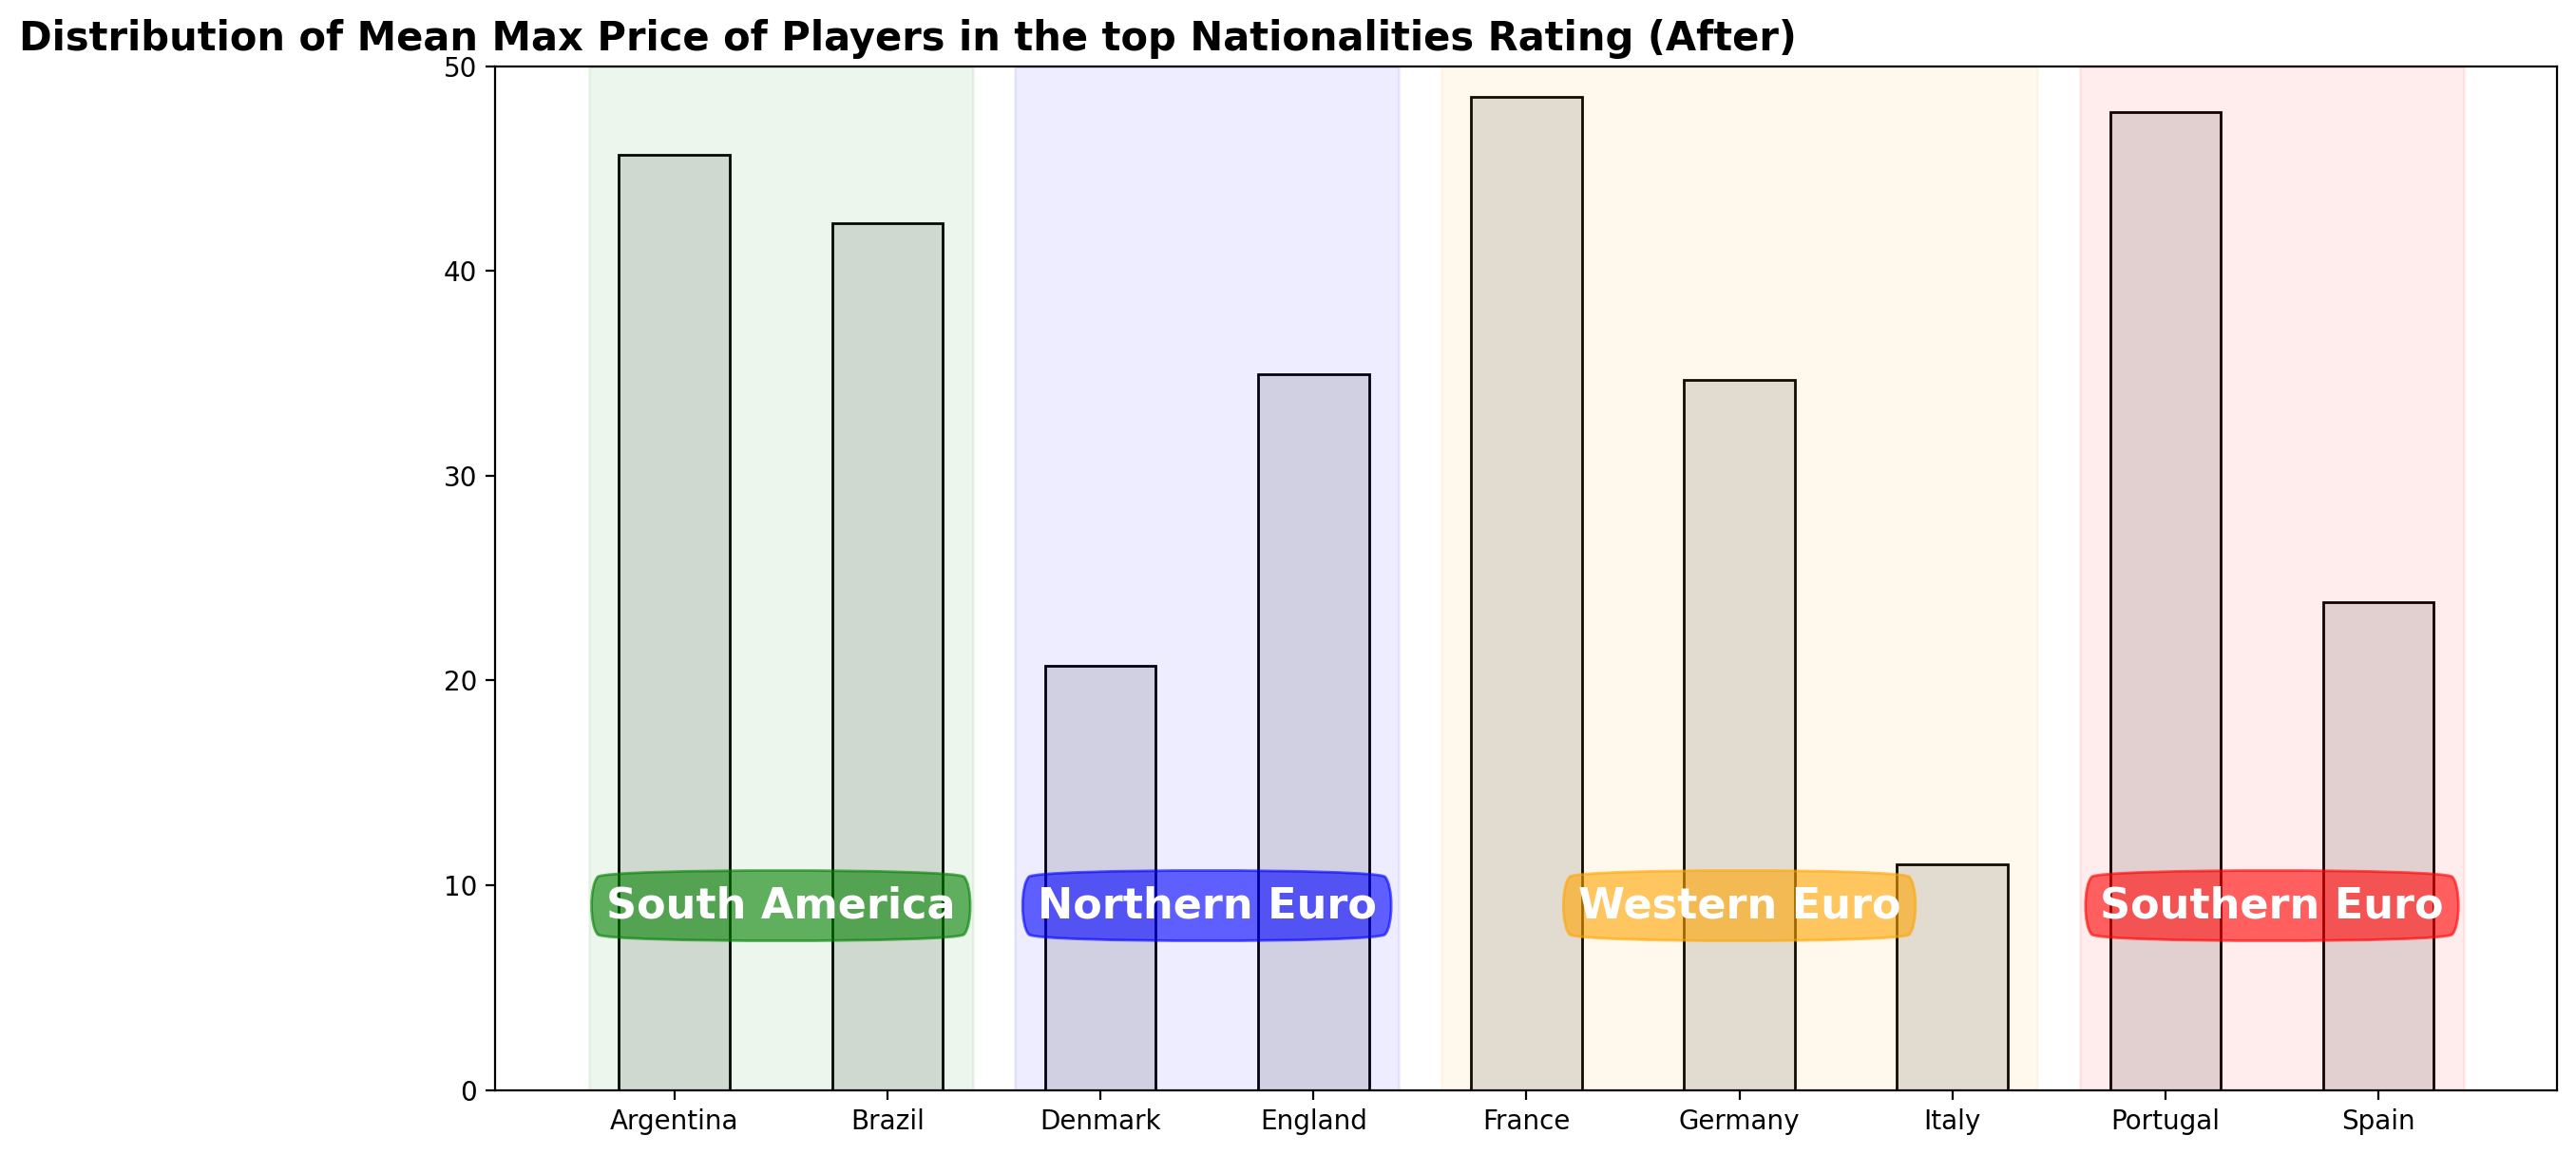

In [ ]:
#fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
#ax.bar(temp1.index, temp1, color="#00FF00", width=0.5, edgecolor='black')
#ax.set_title(f'Median Max Price of Players in the top Nationalities', fontweight='bold')
#plt.show()

region_barplot(temp1, 'Mean Max Price of Players in the top Nationalities', 9, 50)

From this we can see that France, Portugal, Argentina, and Brazil seem to have the best players based on the average they are payed. I believe this to be true based on the most recent winners of the world cup. With the most amount of wins getting handed to Brazil with 5, the most recent winners being Argentina 2022, France in 2018 (Olympics).

##Q2 Out of the top 5 outfitters, which has the most players out of the top 5 leagues

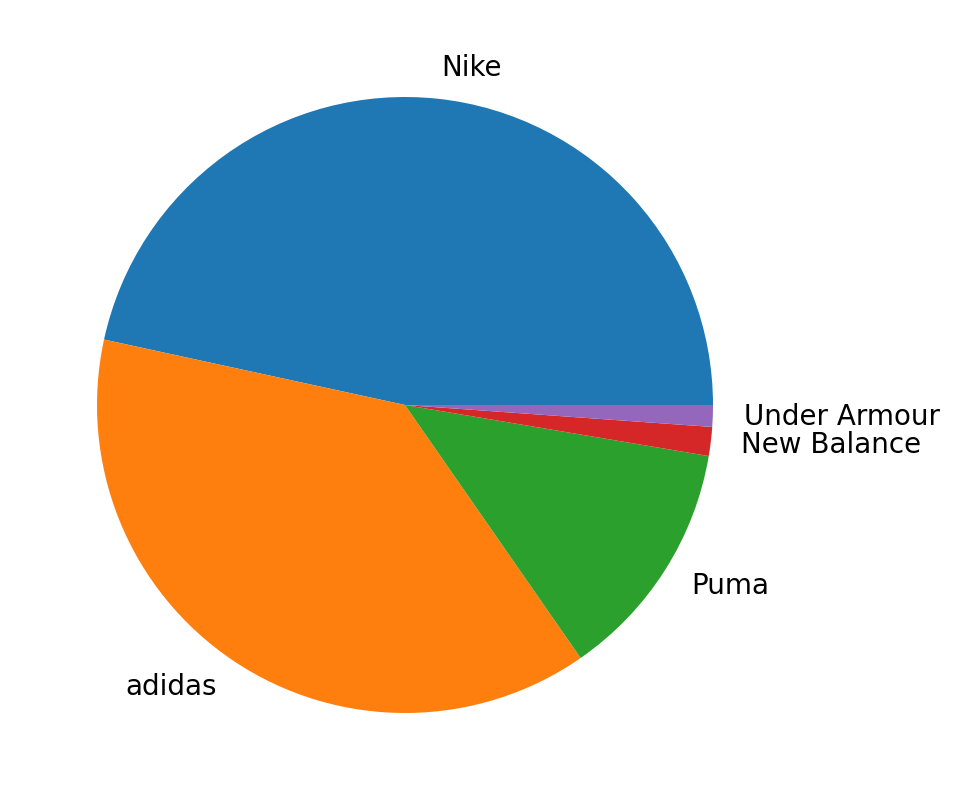

In [ ]:
dataset_outfitter = dataset.value_counts('outfitter')

dataset1 = dataset_outfitter.head(5)
#print(dataset_outfitter)

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
ax.pie(dataset1, labels = dataset1.index)


plt.show()


From this piechart, we can see that both Nike and Adidas dominate the top 5 leagues, being so they are the two biggest athletic wear companies

##Q3. Who are the best 11 players throughout the leagues using max price

In [ ]:
temp1 = dataset.groupby('position')['max_price'].idxmax()

dataset5 = ['name','max_price', 'position' ]


temp2 = dataset.loc[temp1, dataset5]
print(temp2)

                        name  max_price                       position
2116           Kylian Mbappé      200.0        Attack - Centre-Forward
48           Raheem Sterling      160.0           Attack - Left Winger
2115            Lionel Messi      180.0          Attack - Right Winger
1669       Antoine Griezmann      150.0        Attack - Second Striker
113           Raphaël Varane       80.0         Defender - Centre-Back
88          Andrew Robertson       80.0           Defender - Left-Back
90    Trent Alexander-Arnold      110.0          Defender - Right-Back
1628   Marc-André ter Stegen       90.0                     Goalkeeper
17            Bernardo Silva      100.0  midfield - Attacking Midfield
125        Christian Eriksen      100.0    midfield - Central Midfield
1615     Aurélien Tchouaméni       90.0  midfield - Defensive Midfield
1150            Filip Kostić       40.0       midfield - Left Midfield
1149           Juan Cuadrado       32.0      midfield - Right Midfield


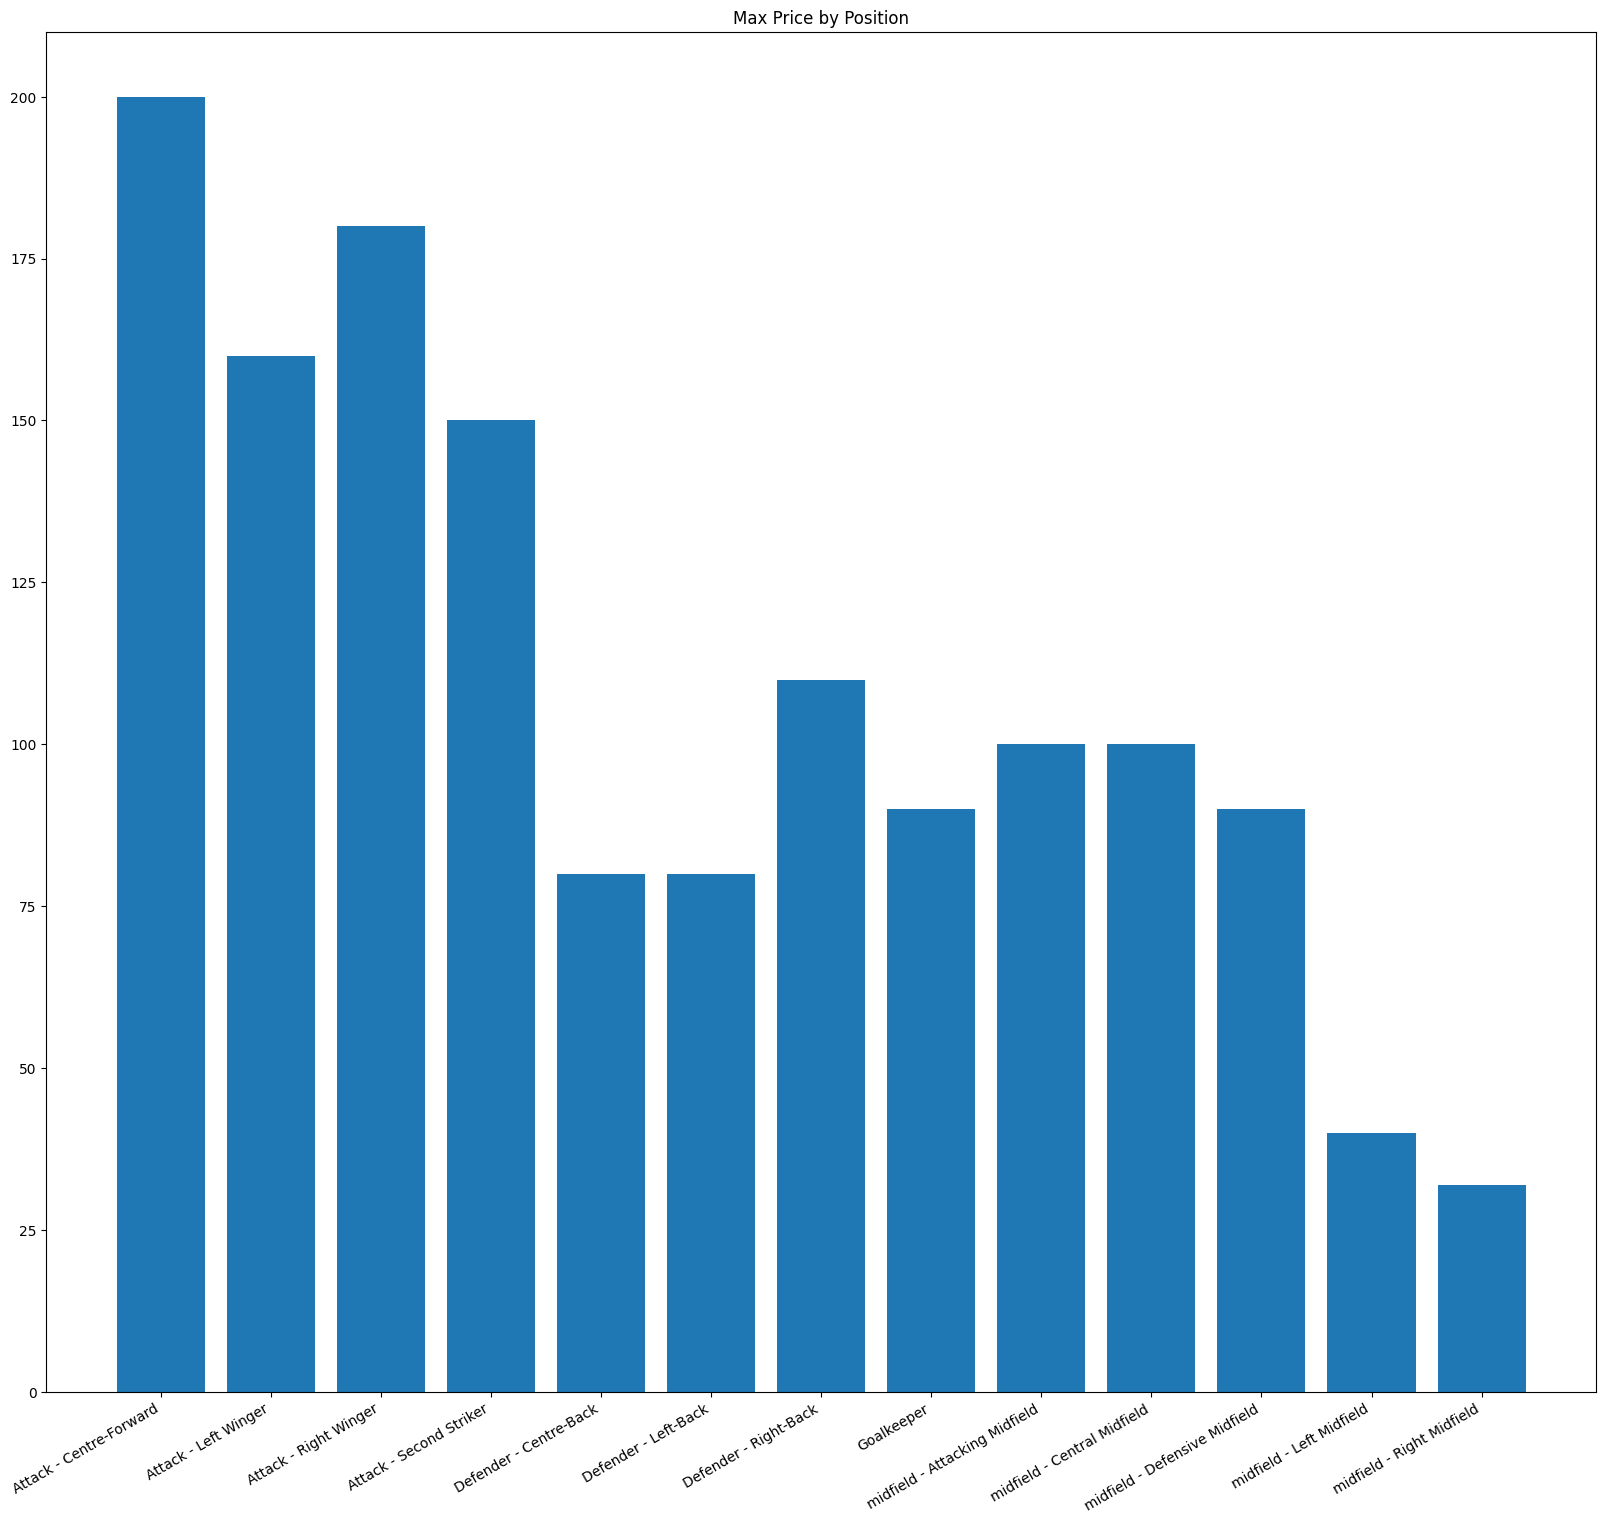

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20), dpi=100)
ax.bar(temp2['position'], temp2['max_price'])
ax.set_title(f'Max Price by Position')

#ax.setup(ax.get_xticklabels(), rotation =45)
fig.autofmt_xdate()


plt.show()

From this we can conclude that the most valuable players in the leagues are Centre-Forwards, Right Wingers, and Left Wingers, making attacking players the most likely to cost the most and to be expected to do the most

##Q4 Which league has the most amount of young players (18-22)?

In [ ]:
youngs = dataset[(dataset['age']< 23) & (dataset['league'] != 'Other')]

temp = youngs['league'].value_counts()

#laliga = dataset[dataset["league"] == "LaLiga"]
#ligue1 = dataset[dataset["league"] == "Ligue1"]
#englishPrem = dataset[dataset["league"] == "EPL"]
#germanLeg = dataset[dataset["league"] == "Bundesliga"]
#italianLeg = dataset[dataset["league"] == "SerieA"]

#german_young = germanLeg["age"].value_counts()[youngs]
#laliga_young = laliga["age"].value_counts()[youngs]
#ligue1_young = ligue1["age"].value_counts()[youngs]
#english_prem_young = englishPrem["age"].value_counts()[youngs]
#italian_leg_young = italianLeg["age"].value_counts()[youngs]


#print('The amount of young players (18-22) playing in the Bundesliga is: ' + str(german_young.sum()))
#print('The amount of young players (18-22) playing in the La Liga is: ' + str(laliga_young.sum()))
#print('The amount of young players (18-22) playing in the Ligue 1 is: ' + str(ligue1_young.sum()))
#print('The amount of young players (18-22) playing in the EPL is: ' + str(english_prem_young.sum()))
#print('The amount of young players (18-22) playing in the Serie A is: ' + str(italian_leg_young.sum()))


def player_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#e0e0e0", width=0.52, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red', 'purple']
    span_range = [[0, 0], [1,  1], [2, 2], [3, 3], [4,4], [5,5]]

    for idx, sub_title in enumerate(['Bundesliga', 'EPL', 'La Liga', 'Ligue 1', 'Serie A']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'Distribution of {title} Rating (After)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()


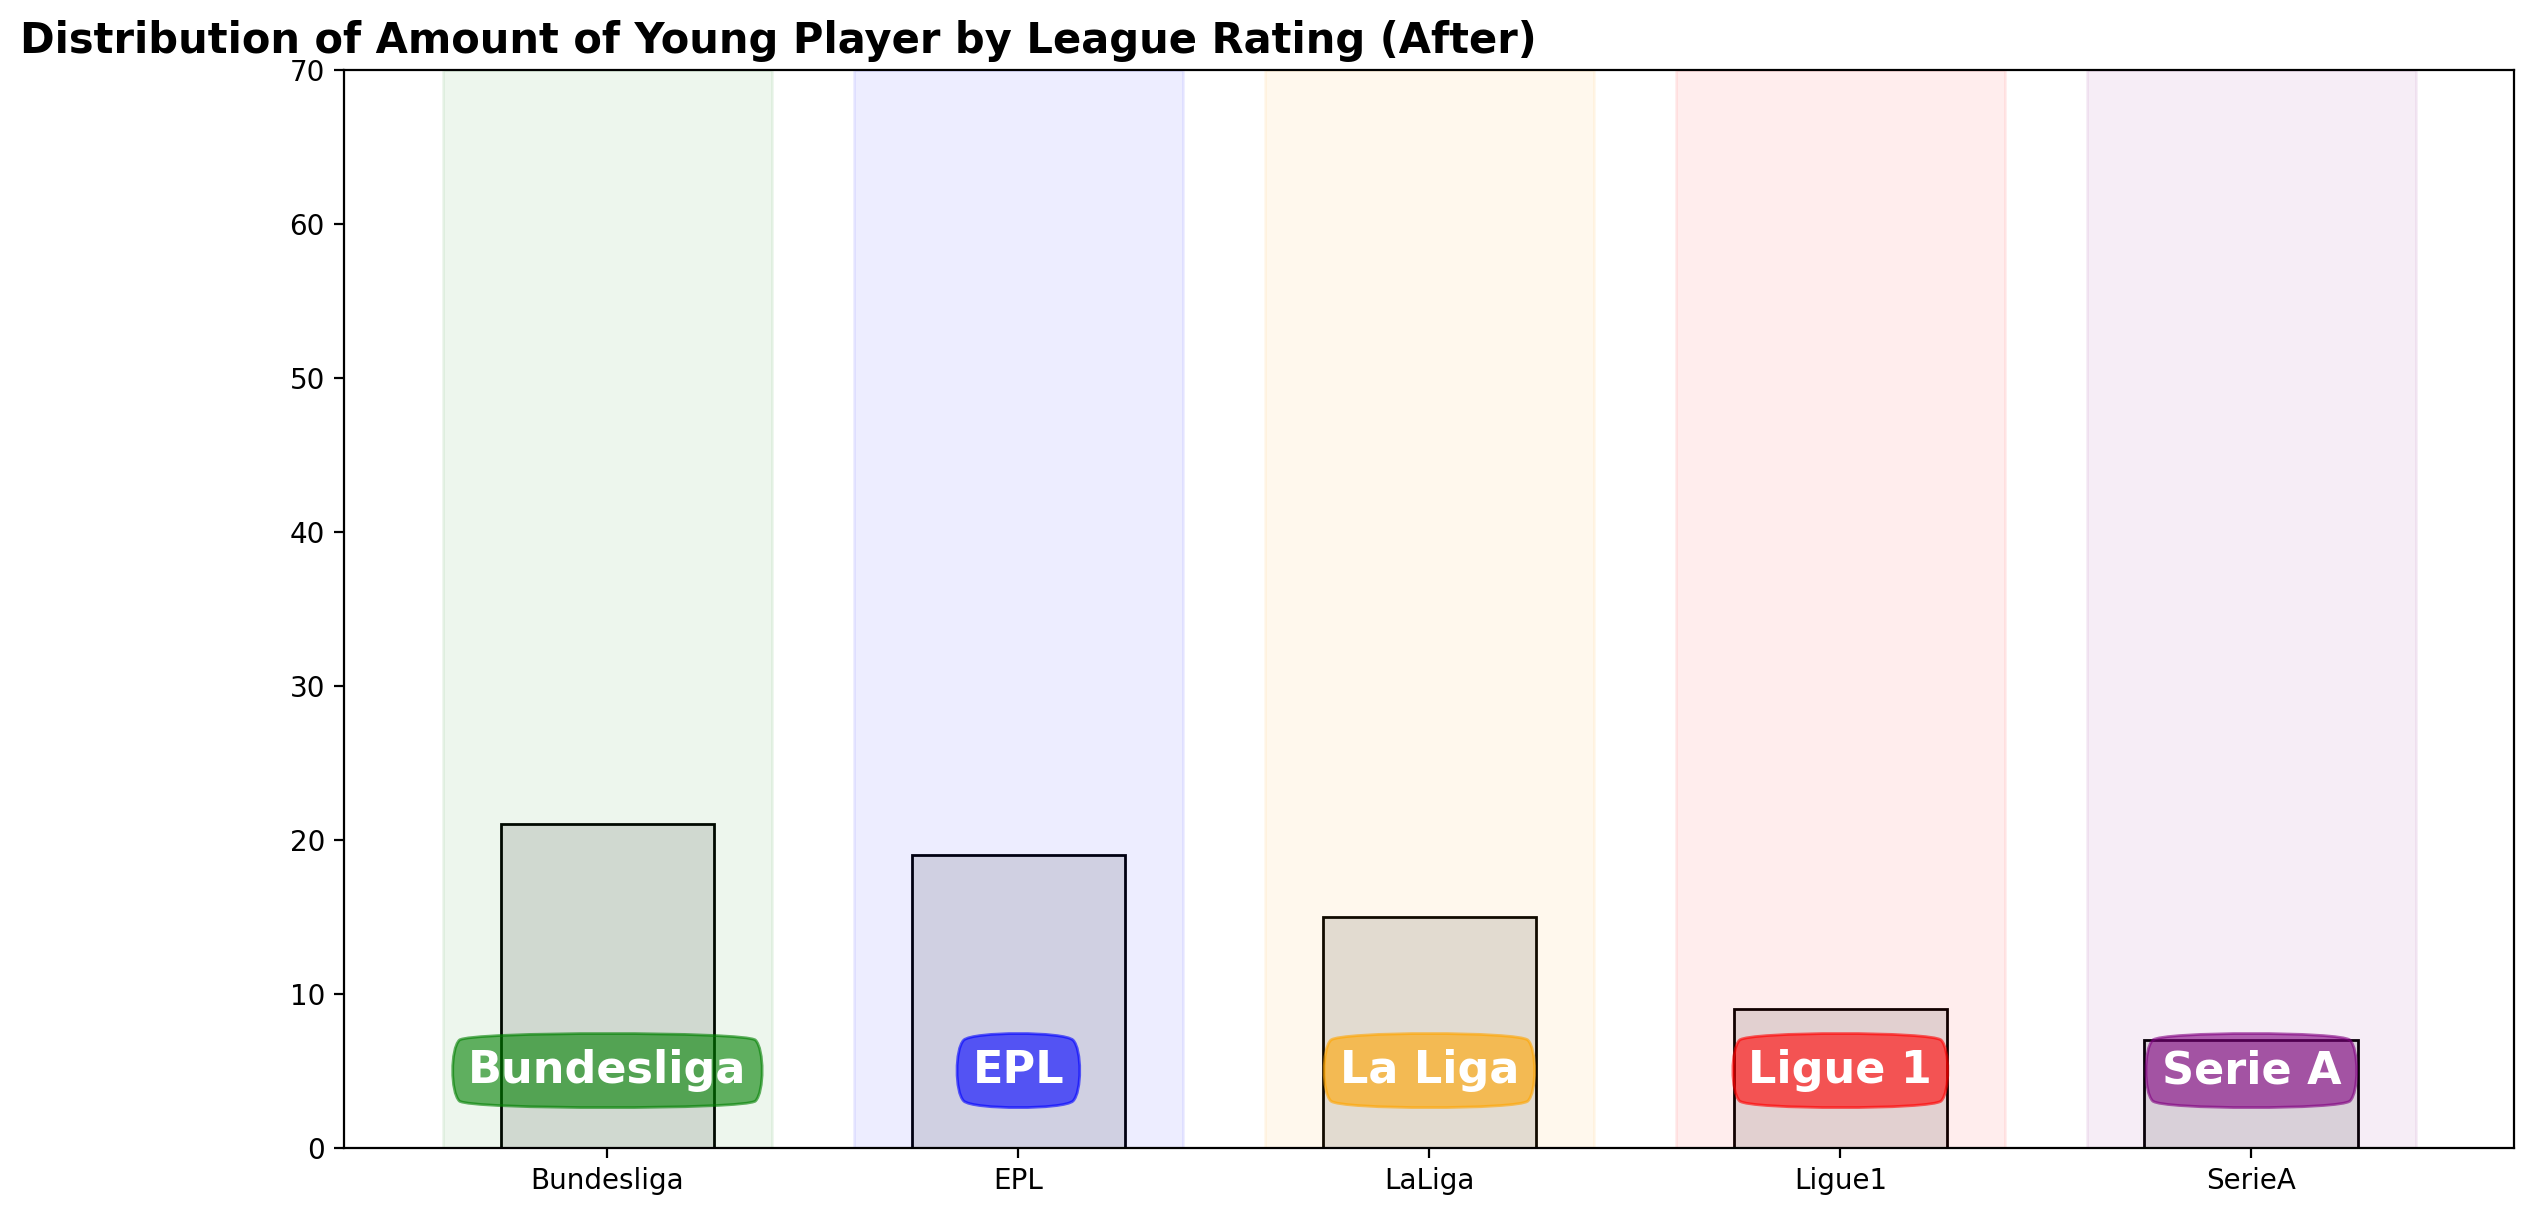

In [ ]:
player_barplot(temp, 'Amount of Young Player by League', 5, 70)

From this we are able to see the amount of young players in each league. Bundesliga being the most amount of young players. This is due to a recent system change, in order to make the league more profitable in developing and then selling the player for more than previously (Bundesliga)

## Q5. Is there a correlation between the younger players price in the market compared to those who are older in the Bundesliga

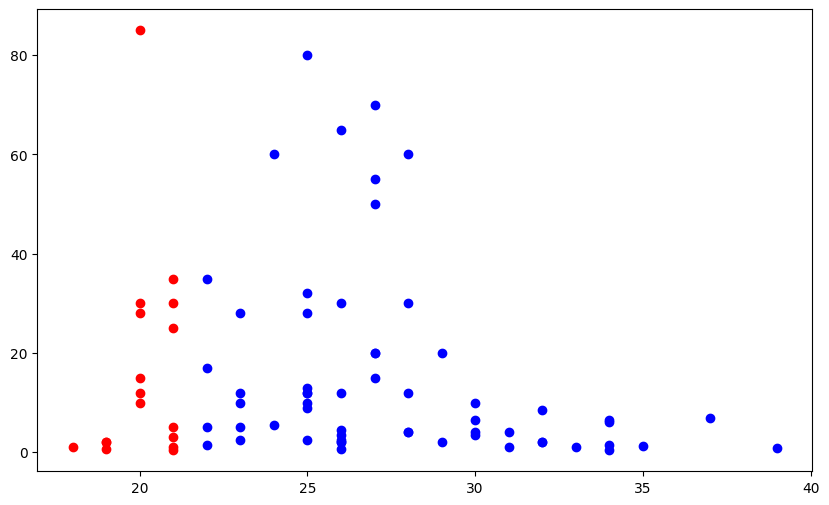

In [ ]:
german_U22 = dataset[(dataset['league'] == "Bundesliga") & (dataset['age'] < 22)]
german_O22 = dataset[(dataset['league'] == "Bundesliga") & (dataset['age'] > 21)]

plt.figure(figsize=(10, 6))
plt.scatter(german_U22['age'], german_U22['price'],  label='Under 22', color='red')
plt.scatter(german_O22['age'], german_O22['price'],  label='Over 22', color='blue')




From the scatterplot, this proves the explanation in question 4 just based on the Bundesliga, with younger players they are able to develop at a great club, get playing time and therefore develop more value to other clubs. Making their market price skyrocket in comparison to players over the age of 22 where we see more median prices.

##Q6.What are the top ten players in each league(based on max price) and what is the mean of the top 10 prices by league?

In [ ]:
dataset_temp = dataset.sort_values(by =['league', 'max_price'])
dataset_temp_new = dataset_temp[dataset_temp['league'] != 'Other']
top10 = dataset_temp_new.groupby('league').tail(10)

print(top10[['name','max_price','league']])

print(dataset_temp_new.groupby('league')['price'].mean())


                         name  max_price      league
618               André Silva       45.0  Bundesliga
538           Dayot Upamecano       60.0  Bundesliga
566              Mats Hummels       60.0  Bundesliga
553            Kingsley Coman       65.0  Bundesliga
539           Lucas Hernández       70.0  Bundesliga
542              João Cancelo       70.0  Bundesliga
616        Christopher Nkunku       80.0  Bundesliga
639             Florian Wirtz       85.0  Bundesliga
556              Serge Gnabry       90.0  Bundesliga
555                Leroy Sané      100.0  Bundesliga
160             Heung-min Son       90.0         EPL
17             Bernardo Silva      100.0         EPL
20              Jack Grealish      100.0         EPL
125         Christian Eriksen      100.0         EPL
90     Trent Alexander-Arnold      110.0         EPL
133              Jadon Sancho      130.0         EPL
164                Harry Kane      150.0         EPL
261         Philippe Coutinho      150.0      

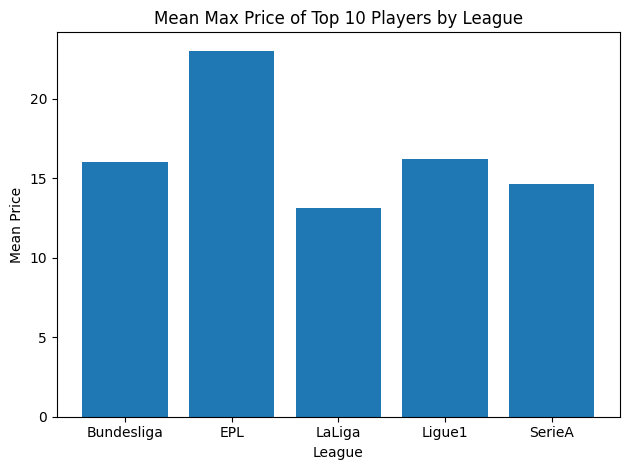

In [ ]:
top10_mean = dataset_temp_new.groupby('league')['price'].mean()

plt.bar(top10_mean.index, top10_mean)

plt.title("Mean Max Price of Top 10 Players by League")
plt.xlabel("League")
plt.ylabel("Mean Price")

plt.tight_layout()
plt.show()

From this barplot, we can easily see that the EPL is the top among the top players prices. Because of this, it makes the EPL one of the toughest leagues out of the 5 (Global Football Rankings)

#Section 4: Summary



From the data we are easily able to see the top 10 player nationalities, based on the mean amount they are vauled at with France taking the top spot. In the second question I discovered that the top 2 outfitters or providers of the jerseys were Nike and Adidas. In question 3, I was able to figure out that the most vauable postion on the field were often given to attacking players, with center forward being the most valuable. In question 4 I was able to find that the league with the most young players was the Bundesliga, and seeing in question 5 that the top 2 paid were under 22 with the median of the group going to over 22 year olds. Finally in question 6, I was able to find that the EPL had the most value based on the top 10 in each league. Making it the most valuable and most expensive

From this data analysis, I think this is useful to presidents or financial advisors in each league. They are able to see where they can profit with younger players and developing them. And possbilly clubs, that want to make their teams most successful, with maybe buying more attacking players.

#Section 5 Conclusions

From this data analysis, I was able to see the top 10 players by nationality, and league based on price. See what league had the most young players, and the comparison of the market value of younger players in that league compared to those who are older. Finally, I was able to see the top outfitters in all 5 leagues combined.

#Section 6 Citations

https://www.globalfootballrankings.com/
https://www.bundesliga.com/en/bundesliga/news/why-germany-is-best-for-young-players-bellingham-musiala-haaland-wirtz-5006
https://en.wikipedia.org/wiki/United_Nations_geoscheme
https://olympics.com/en/news/fifa-world-cup-winners-list-champions-record
